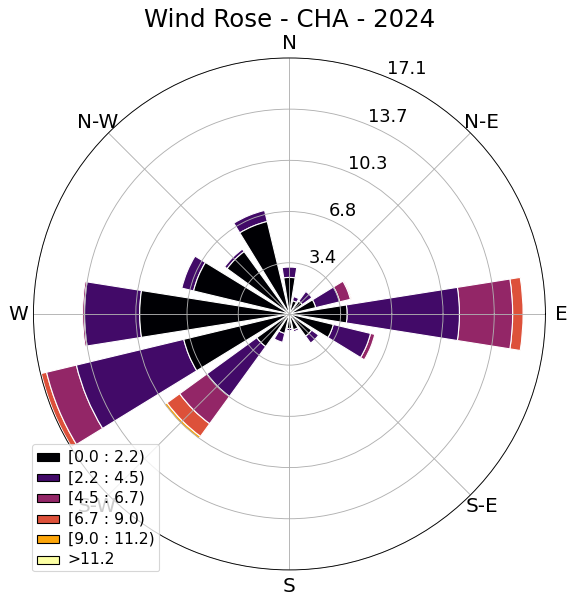

<Figure size 640x480 with 0 Axes>

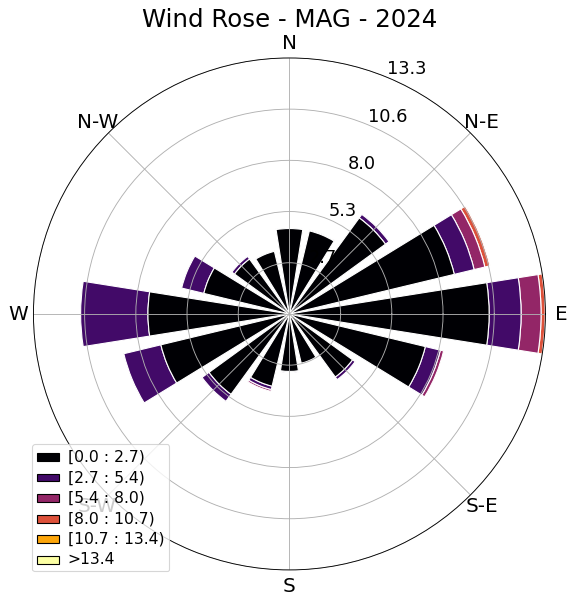

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from windrose import WindroseAxes

# Load your data
df = pd.read_csv('Wind Speed and Direction.csv', sep=';', decimal=',')

# Convert the 'time' column to datetime format
df['time'] = pd.to_datetime(df['time'], format='%d.%m.%Y %H:%M')

# Filter data for the desired year, e.g., 2024
df_year = df[df['time'].dt.year == 2024]

# Function to plot wind rose for a given station and year
def plot_annual_wind_rose(directions, speeds, station_name, year):
    ax = WindroseAxes.from_ax()
    cmap = plt.cm.inferno  # Choose a colormap

    ax.bar(directions, speeds, normed=True, opening=0.8, edgecolor='white', cmap=cmap)
    
    # Increase the font size of the numerical labels in the legend (keep at 14)
    legend = ax.set_legend()
    for text in legend.get_texts():
        text.set_fontsize(14)

    # Increase title font size
    ax.set_title(f"Wind Rose - {station_name} - {year}", fontsize=22)

    # Increase tick label font sizes (both direction and speed scales)
    ax.tick_params(axis='both', which='major', labelsize=16)

    # Increase label font sizes for cardinal directions (N, NE, E, etc.)
    for label in ax.get_xticklabels():
        label.set_fontsize(18)

    return ax

# Plot for Station 1 (CHA)
plot_annual_wind_rose(df_year["dCHA"], df_year["vCHA"], "CHA", 2024)

# Plot for Station 2 (MAG)
plt.figure()
plot_annual_wind_rose(df_year["dMAG"], df_year["vMAG"], "MAG", 2024)

plt.show()

<Figure size 640x480 with 0 Axes>

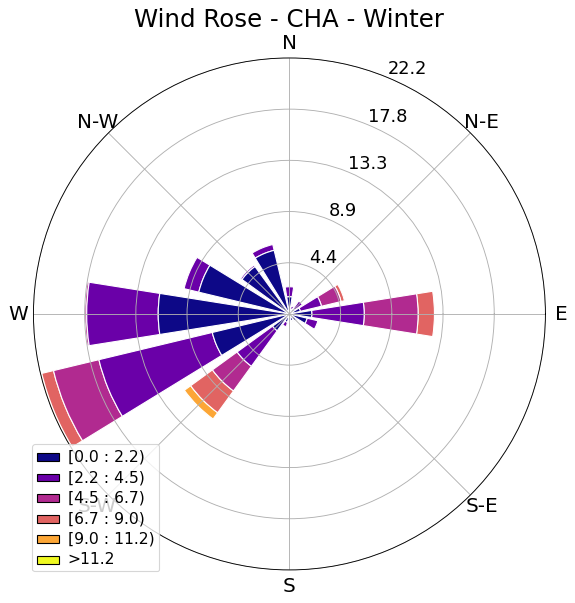

<Figure size 640x480 with 0 Axes>

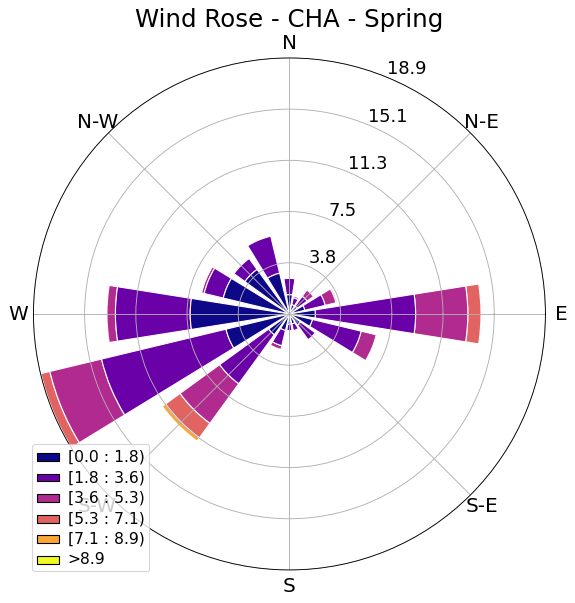

<Figure size 640x480 with 0 Axes>

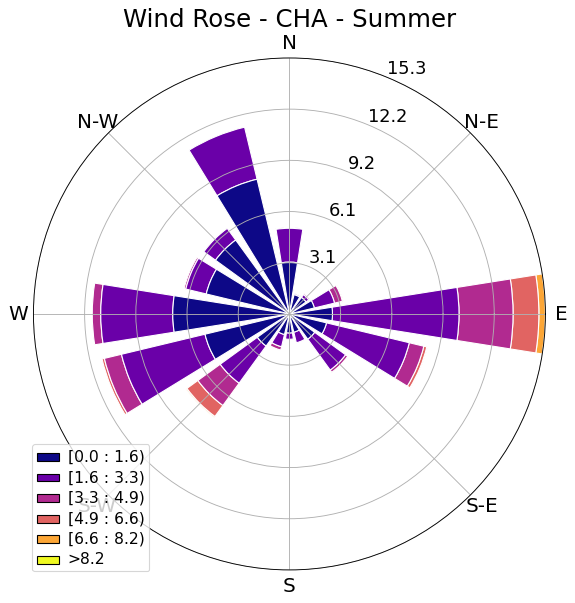

<Figure size 640x480 with 0 Axes>

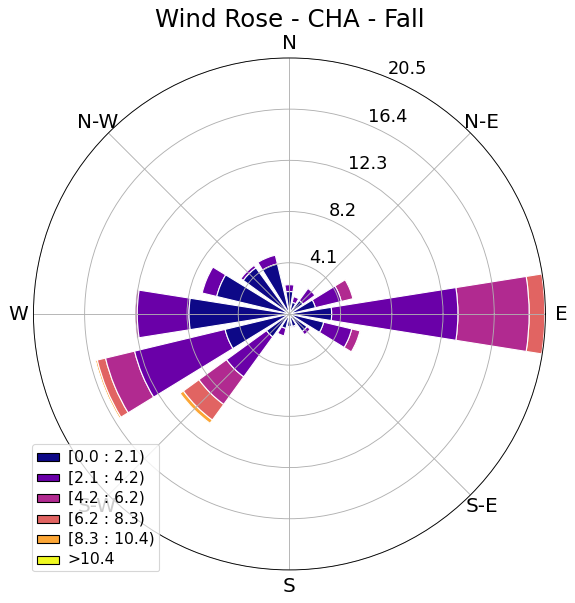

<Figure size 640x480 with 0 Axes>

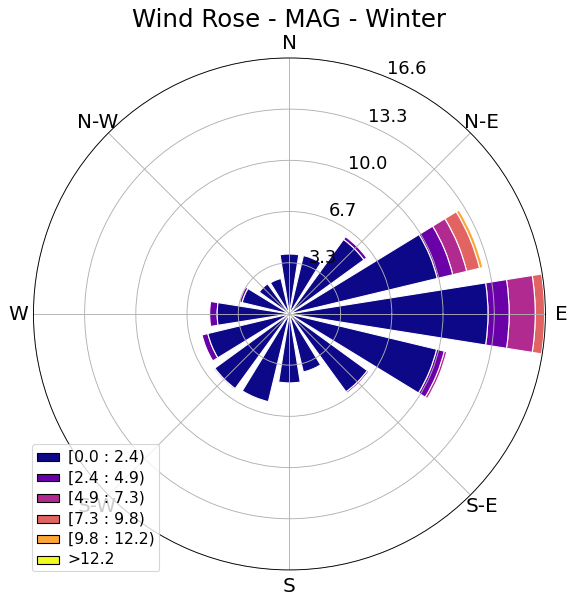

<Figure size 640x480 with 0 Axes>

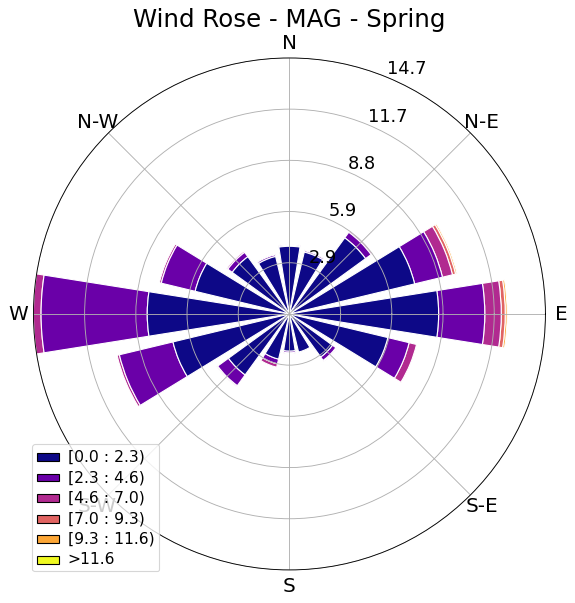

<Figure size 640x480 with 0 Axes>

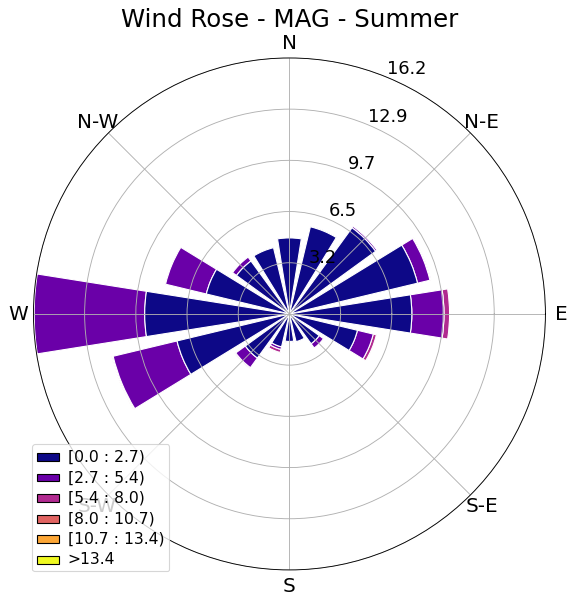

<Figure size 640x480 with 0 Axes>

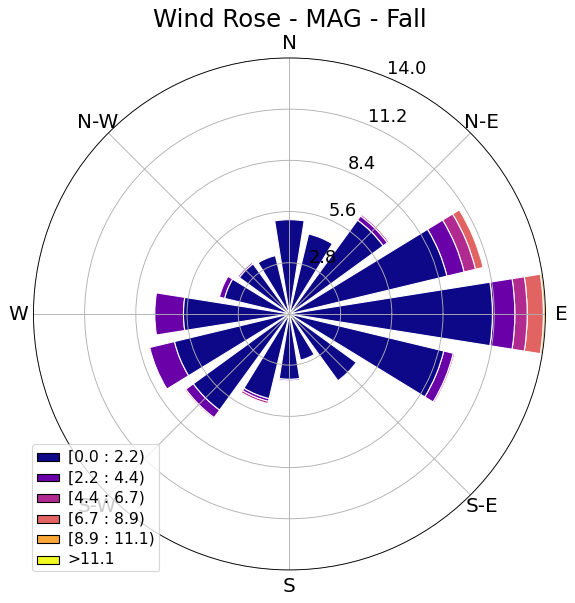

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from windrose import WindroseAxes

# Load your data
df = pd.read_csv('Wind Speed and Direction.csv', sep=';', decimal=',')
df['time'] = pd.to_datetime(df['time'], format='%d.%m.%Y %H:%M')

# Function to plot wind rose for one station
def plot_wind_rose(directions, speeds, station_name, season_name):
    ax = WindroseAxes.from_ax()

    cmap = plt.cm.plasma  # Colormap
    
    ax.bar(directions, speeds, normed=True, opening=0.8, edgecolor='white', cmap=cmap)
    
    # Legend font size (keep at 14)
    legend = ax.set_legend()
    for text in legend.get_texts():
        text.set_fontsize(14)

    # Title font size
    ax.set_title(f"Wind Rose - {station_name} - {season_name}", fontsize=22)

    # Tick label sizes (both radial and directional labels)
    ax.tick_params(axis='both', which='major', labelsize=16)

    # Cardinal direction labels (N, NE, etc.)
    for label in ax.get_xticklabels():
        label.set_fontsize(18)

    return ax

# Function to plot for all seasons
def plot_for_seasons(df, station_name, direction_column, speed_column):
    seasons = ['Winter', 'Spring', 'Summer', 'Fall']
    
    # Define months for each season
    season_months = {
        'Winter': [12, 1, 2],
        'Spring': [3, 4, 5],
        'Summer': [6, 7, 8],
        'Fall': [9, 10, 11]
    }

    # Create a plot for each season
    for season in seasons:
        season_months_list = season_months[season]
        season_data = df[df['time'].dt.month.isin(season_months_list)]

        plt.figure()
        plot_wind_rose(season_data[direction_column], season_data[speed_column], station_name, season)

# Plot for Station 1 (CHA)
plot_for_seasons(df, "CHA", "dCHA", "vCHA")

# Plot for Station 2 (MAG)
plot_for_seasons(df, "MAG", "dMAG", "vMAG")

plt.show()